Challenge Técnico (Core) Objetivo: Los estudiantes deberán participar en una competencia de Kaggle, realizar un análisis completo del dataset, entrenar y evaluar al menos cinco modelos diferentes, y realizar un benchmark para comparar su rendimiento. El resultado final debe ser subido a GitHub.

**Overview**
Welcome to the 2025 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting and approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

Your Goal: Your objective is to predict whether a person is an Introvert or Extrovert, given their social behavior and personality traits.

**DEA realizado en archivo DEA_competicion.ipynb**

### competencia de clasificación

In [1]:
import pandas as pd

In [3]:
path ='/content/drive/MyDrive/Bootcamp-ML/Cores/competicion_kaggles/personality_datasert_Clean.csv'
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2498 non-null   float64
 1   Stage_fear                 2498 non-null   object 
 2   Social_event_attendance    2498 non-null   float64
 3   Going_outside              2498 non-null   float64
 4   Drained_after_socializing  2498 non-null   object 
 5   Friends_circle_size        2498 non-null   float64
 6   Post_frequency             2498 non-null   float64
 7   Personality                2498 non-null   object 
dtypes: float64(5), object(3)
memory usage: 156.3+ KB


In [5]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2498.0,4.0,3.0,0.0,1.0,3.0,7.0,11.0
Social_event_attendance,2498.0,4.0,3.0,0.0,2.0,4.0,7.0,10.0
Going_outside,2498.0,3.0,2.0,0.0,1.0,3.0,5.0,7.0
Friends_circle_size,2498.0,7.0,4.0,0.0,3.0,6.0,10.0,15.0
Post_frequency,2498.0,4.0,3.0,0.0,1.0,3.0,6.0,10.0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# **Split : features y target**
* Se estima conveniente incluir a todas las features en el X, para una primera versión de ML, en el caso de obtener métricas de predicción bajas o erróneas, se estimará la eliminación de algunas de ellas.

In [7]:
df.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,3.0,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [8]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [9]:
X=df.drop(columns='Personality')

y=df['Personality']

In [10]:
# Dividir en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Definir Variables
num_cols = ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
nom_cols = ['Stage_fear', 'Drained_after_socializing']

# **Regresión Logistica**

In [13]:
# Preprocesamiento.
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)

])

In [14]:
# Pipeline con logistic regression.
pipeline_logreg = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

In [15]:
# Entrenar.
pipeline_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Stage_fear',
                                                   'Drained_after_socializing'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [16]:
# Prediccion.
y_pred_logreg = pipeline_logreg.predict(X_test)

In [17]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

**Algoritmo de Classificación con Árbol de regresión**

In [18]:
# Preprocesador.
preprocessor_tree = ColumnTransformer(transformers=[
    ("num", "passthrough", num_cols)
])

# Modelo.
pipeline_tree = Pipeline([
    ("preprocessing", preprocessor_tree),
    ("model", DecisionTreeClassifier(max_depth=8, random_state=42))
])

In [19]:
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=8, random_state=42))])

In [20]:
# Prediccion.
y_pred_tree = pipeline_tree.predict(X_test)

In [21]:
# evaluar.
accuracy = accuracy_score(y_test, y_pred_tree)

**Algoritmo de Clasificación con KNN**

In [22]:
# Preprocesador.
preprocessor_knn = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols) #
])

# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("model", KNeighborsClassifier(n_neighbors=3))
])

In [23]:
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency'])])),
                ('model', KNeighborsClassifier(n_neighbors=3))])

In [24]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

**Algoritmo de Regresión con Random Forest**

In [25]:
# Preprocesador.
preprocessor_forest = ColumnTransformer(transformers=[
    ("num", "passthrough", num_cols)
])

# Modelo.
pipeline_forest = Pipeline([
    ("preprocessing", preprocessor_forest),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [26]:
# Entrenamiento.
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [27]:
# Prediccion.
y_pred_forest = pipeline_forest.predict(X_test)

# SVM

In [28]:
from sklearn.svm import SVC

In [29]:
preprocessor_svm = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('nom', OneHotEncoder(handle_unknown='ignore'), nom_cols)
    ])


In [30]:
# Pipeline SVM
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor_svm),
    ('classifier', SVC(random_state=42))
])

In [31]:
# Entrenar
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Stage_fear',
                                                   'Drained_after_socializing'])])),
                ('classifier', SVC(random_state=42))])

In [33]:
# Predecir
y_pred_svm = pipeline_svm.predict(X_test)

**Evaluación de los algoritmos o modelos entrenados para predecir la personalidad**

In [34]:
# Evaluar Accuracy
print("Accuracy Regresión Logística:", accuracy_score(y_test, y_pred_logreg))
print("Accuracy Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))
print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))
print("Accuracy Random Forest :", accuracy_score(y_test, y_pred_forest))
print("Accuracy SVM :", accuracy_score(y_test, y_pred_svm))

Accuracy Regresión Logística: 0.906
Accuracy Árbol de Decisión: 0.894
Accuracy KNN: 0.904
Accuracy Random Forest : 0.878
Accuracy SVM : 0.908


# **Análisis de Resultados de los Modelos**
Ranking de Performance

SVM: 90.8%  (Mejor modelo)
Regresión Logística: 90.6%
KNN: 90.4%
Árbol de Decisión: 89.4%
Random Forest: 87.8% (Sorprendentemente bajo)

# <font color="purple">**Exportación Mejor Modelo: SVM**</font>


SVM (Accuracy: 90.8%), el modelo con mejor rendimiento en la predicción de la personalidad


In [42]:
import joblib

path ='/content/drive/MyDrive/Bootcamp-ML/Cores/competicion_kaggles/mmodelo_sinopt_svm.pkl'
joblib.dump(pipeline_svm, path)

['/content/drive/MyDrive/Bootcamp-ML/Cores/competicion_kaggles/mmodelo_sinopt_svm.pkl']

# **<font color="tomato">Optimizadores con Gridsearch</font>**

In [43]:
from sklearn.model_selection import GridSearchCV

# **Optimizador KNN**

In [44]:
# Preprocesador.
preprocessor_knn = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols)
])

# Model.
knn_pipeline = Pipeline([
    ("pp", preprocessor_knn),
    ("model", KNeighborsClassifier())
])

In [45]:
# Optimizacion de hiperparametros.
knn_params = {
    "model__n_neighbors": [10, 15, 20, 25]

    }

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring="accuracy")
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Time_spent_Alone',
                                                                          'Social_event_attendance',
                                                                          'Going_outside',
                                                                          'Friends_circle_size',
                                                                          'Post_frequency'])])),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [10, 15, 20, 25]},
             scoring='accuracy')

In [46]:
# Evaluación.
knn_bestg = knn_grid.best_estimator_ #prediccion con la mejor estimador

In [47]:
knn_bestg

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency'])])),
                ('model', KNeighborsClassifier(n_neighbors=15))])

In [48]:
y_pred_knng = knn_bestg.predict(X_test)

print("KNN Regressor")
print("Mejores parámetros:", knn_grid.best_params_) #mejor parametro --- > no es necesario probarlo, se puede hacer otro grisearch con 10, 15 , 20.. o menores..es hasta que mp cambie
print("accuracy:", accuracy_score(y_test, y_pred_knng))

KNN Regressor
Mejores parámetros: {'model__n_neighbors': 15}
accuracy: 0.908


# **Optimizador Random Forest**

In [49]:
# Preprocesador.
preprocessor_forest = ColumnTransformer(transformers=[
    ("num", "passthrough", num_cols)
])

# Modelo.
pipeline_forest = Pipeline([
    ("pp", preprocessor_forest),
    ("model", RandomForestClassifier(random_state=42))
])

In [50]:
# Optimizacion de hiperparametros.
forest_params = {
    "model__n_estimators": [100, 200, 300] # El nombre debe coincidir con el nombre del modelo.
}

forest_grid = GridSearchCV(pipeline_forest, forest_params, cv=3, scoring="accuracy")
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['Time_spent_Alone',
                                                                          'Social_event_attendance',
                                                                          'Going_outside',
                                                                          'Friends_circle_size',
                                                                          'Post_frequency'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'model__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [51]:
# Evaluación.
forest_best = forest_grid.best_estimator_
y_pred_forest = forest_best.predict(X_test)


In [52]:

print("Random Forest Classifier")
print("Mejores parámetros:", forest_grid.best_params_)
print("Accuraccy:", accuracy_score(y_test, y_pred_forest))

Random Forest Classifier
Mejores parámetros: {'model__n_estimators': 100}
Accuraccy: 0.878


# **Evaluación de los modelos**

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

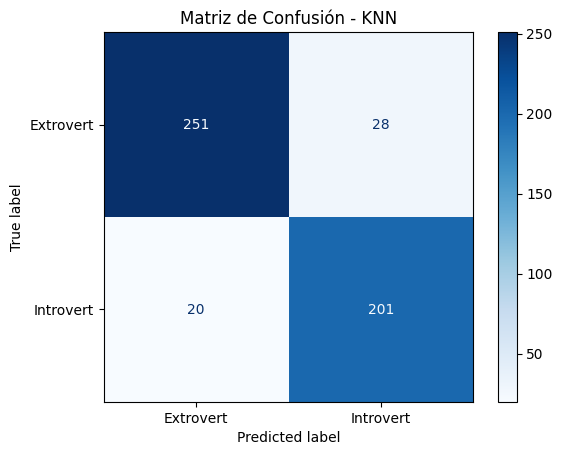

In [60]:
# Predicciones
disp_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap="Blues", normalize=None)

plt.title("Matriz de Confusión - KNN")
plt.show()



**Clase Extrovert:**
KNN: 251 predicciones correctas. Erroneas: 29 como introvert

**Clase Introvert:**
KNN: 201 predicciones correctas. Erroneas: 20 como extrovert









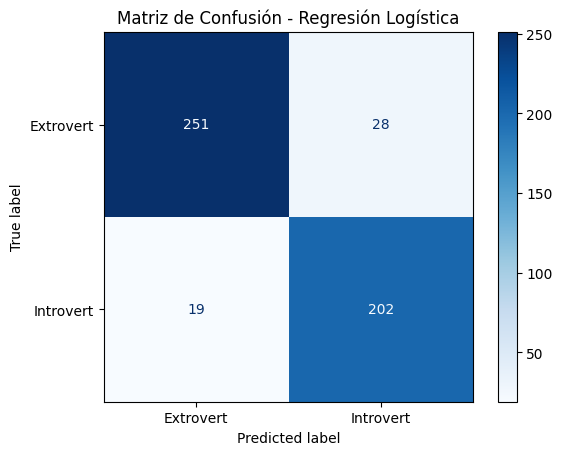

In [61]:
# Matriz de confusión - Regresión Logística
disp_rf = ConfusionMatrixDisplay.from_predictions(y_test,y_pred_logreg, cmap="Blues", normalize=None)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


**Clase Extrovert:**
KNN: 251 predicciones correctas. Erroneas: 28 como introvert

**Clase Introvert:**
KNN: 202 predicciones correctas. Erroneas: 19 como extrovert




Regresión Logística y KNN en precisión general, son muy similares